In [1]:
## Import Ticker class from yahooquery library 
# To access data from yahooquery, an argument (Company ticker symbol) is passed to the Ticker class 

from yahooquery import Ticker
import pandas as pd

In [8]:
## Create instance of Ticker class (Company ticker symbol)

WES_ASX = Ticker(['VOO'])

In [11]:
# Select History from Ticker class, this will return a DataFrame of historical stock price data 
# A period of 5 years has been selected for historical analysis 

stockPrice = WES_ASX.history(period="10y")

# Print results 

stockPrice = stockPrice.reset_index()

In [12]:
stockPrice

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,VOO,2013-06-17,150.479996,151.279999,149.779999,150.600006,1048100,125.455284,0.0,0.0
1,VOO,2013-06-18,150.699997,152.000000,150.699997,151.759995,1033300,126.421600,0.0,0.0
2,VOO,2013-06-19,151.679993,151.940002,149.660004,149.740005,990950,124.738892,0.0,0.0
3,VOO,2013-06-20,148.220001,148.440002,145.559998,145.940002,1686200,121.573349,0.0,0.0
4,VOO,2013-06-21,146.960007,147.100006,144.979996,146.399994,1565400,121.956543,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2513,VOO,2023-06-09,395.049988,396.929993,394.079987,395.029999,3060100,395.029999,0.0,0.0
2514,VOO,2023-06-12,395.980011,398.690002,395.299988,398.660004,3792700,398.660004,0.0,0.0
2515,VOO,2023-06-13,400.019989,401.850006,399.399994,401.290009,3913100,401.290009,0.0,0.0
2516,VOO,2023-06-14,401.609985,403.440002,398.459991,401.600006,5161300,401.600006,0.0,0.0


<AxesSubplot:xlabel='date'>

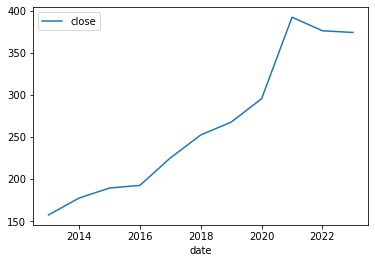

In [35]:
stockPrice['date'] = pd.to_datetime(stockPrice['date'])

averageClose = pd.DataFrame(stockPrice.groupby(stockPrice.date.dt.year)['close'].mean())

plot = averageClose.plot.line()

plot

<AxesSubplot:ylabel='date'>

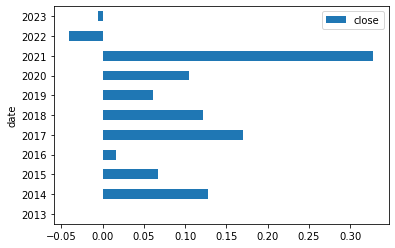

In [39]:
annualDelta = averageClose.pct_change()

bar = annualDelta.plot.barh()

bar